# Analyzing the scraped data
When scraping data from the internet, we often need to do some "sanity checks" to make sure that the collected data is what we expect it to be, because in scraping we are exposed to connection problems, bans from the host, and errors caused by the differences between the HTML structures of different web pages.

In this notebook, you are asked to plot some graphs to explore the data that you have collected and find the problems in it, if any.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import datetime as dt
import json

## 1. Exploring the downloaded HTML files

### Task 1.1
In this task, you have to plot the distribution of the file sizes of the HTML pages that you have downloaded. Usually, all pages will have a similar size. If you notice that you have a number of files with a significantly different size than the majority of the files, then it may be a good idea to check these files and explore the reason behind this difference. For example, in our code we are saving empty HTML files if we face an error while downloading the web pages. Therefore, seeing a number of files with size zero in the histogram indicates that we have some HTML pages that were not downloaded.

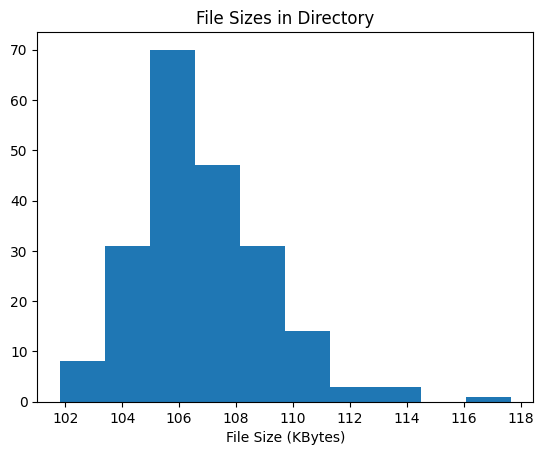

In [2]:
# Plot the distribution of the downloaded HTML file sizes
# WRITE YOUR CODE HERE

# This is the path where the HTML's are stored
path = "C:\\Repositories\\CS210\\Homework_2\\data\\raw_html"

#Dict is filled with file names and file sizes
file_sizes = {}
for file in os.listdir(path):
     if os.path.isfile(os.path.join(path, file)):
        file_sizes[file] = os.path.getsize(os.path.join(path, file))

#Byte to Kbyte conversion
for i in file_sizes.keys():
    file_sizes[i] = file_sizes[i] / 1024

# Plotting the histogram here
plt.hist(file_sizes.values())
plt.xlabel('File Size (KBytes)')
plt.title('File Sizes in Directory')

# Save the final plot in figures/file_sizes.png using the code below
plt.savefig('figures/html_file_size.png')

# Apparently .show() method deletes everything so I am invoking it afterwards
plt.show()

### Task 1.2
Since the HTML file size is significantly affected by the images it contains, another way to explore the downloaded HTML files is by looking at the number of lines in each file. In this task, you need to plot a distribution of the number of lines in the downloaded HTML files.

[1920, 1896, 1847, 1862, 1846, 1856, 1888, 1857, 1873, 1788, 1880, 1817, 1836, 1863, 1850, 1891, 1912, 1798, 1806, 1851, 1823, 1772, 1797, 1910, 1888, 1857, 1867, 1861, 1864, 1872, 2059, 1938, 1807, 1795, 1839, 1888, 1858, 1944, 1804, 1791, 1902, 1848, 1900, 1888, 1894, 1829, 1875, 1849, 1894, 1855, 1866, 1934, 1912, 1795, 1806, 1839, 1860, 1888, 1943, 1878, 1832, 1855, 1878, 1862, 1867, 1797, 1890, 1850, 1784, 1836, 1795, 1877, 1956, 1852, 1873, 1874, 1870, 1901, 1876, 1812, 1870, 1884, 1843, 1841, 1871, 1873, 1891, 1871, 1799, 1926, 1865, 1870, 1815, 1809, 1871, 1895, 1839, 1809, 1831, 1845, 1875, 1862, 1806, 1845, 1860, 1846, 1852, 1850, 1865, 1807, 1897, 1774, 1800, 1885, 1817, 1860, 1847, 1915, 1789, 1949, 1801, 1865, 1914, 1851, 1883, 1853, 1835, 1860, 1855, 1867, 1865, 1846, 1861, 1871, 1868, 1869, 1869, 1850, 1819, 1911, 1890, 1810, 1879, 1774, 1893, 1900, 1890, 1796, 1850, 1796, 1902, 1841, 1875, 1827, 1869, 1854, 1874, 1994, 1866, 1867, 1875, 1864, 1800, 1889, 1823, 1894, 184

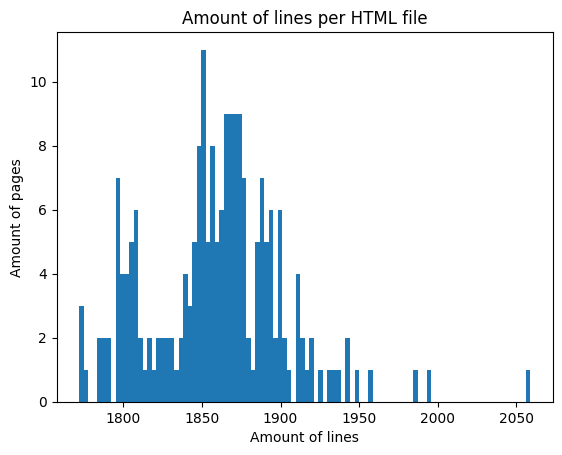

In [3]:
# Plot the distribution of line counts in the downloaded HTML files
# WRITE YOUR CODE HERE

# This is the path where the HTML's are stored
path = "C:\\Repositories\\CS210\\Homework_2\\data\\raw_html"

# List to store the count of newlines
list = []

for file in os.listdir(path):
    with open(os.path.join(path, file), "r", encoding="utf-8") as html:
        count = 0
        for line in html:
            count += 1
        list.append(count)

print(list)
plt.hist(list, bins=100)
plt.title("Amount of lines per HTML file")
plt.xlabel("Amount of lines")
plt.ylabel("Amount of pages")

# Save the final plot in figures/html_line_count.png using the code below
plt.savefig('figures/html_line_count.png')

# Apparently .show() method deletes everything so I am invoking it afterwards.
plt.show()

## 2. Exploring the processed data

### Task 2.1
The first thing to check is if we have extracted information from all of the collected links or not. In this task, you need to compare the number of links that you have collected (in link_list.txt) to the number of parsed data dictionaries (in parsed_data.jsons) that you have created by parsing the downloaded HTML files.

In [4]:
# Compute the number of links in link_list.txt
# WRITE YOUR CODE HERE
n_collected_links = 0

# Compute the number of the parsed data dictionaries in parsed_data.jsons
# WRITE YOUR CODE HERE
n_parsed_links = 0

path_txt = "C:\\Repositories\\CS210\\Homework_2\\data\\link_list.txt"
path_json = "C:\\Repositories\\CS210\\Homework_2\\data\\parsed_data.jsons"

with open(path_txt, "r", encoding = "utf-8") as links:
    for lines in links:
        n_collected_links += 1

with open(path_json, "r", encoding = "utf-8") as parsed:
    for lines in parsed:
        n_parsed_links += 1

# This correction is for the fact that the first line consists of the context of columns.
n_collected_links -= 1

print(f"Number of collected links: {n_collected_links}")
print(f"Number of parsed links: {n_parsed_links}")

Number of collected links: 208
Number of parsed links: 208


### Task 2.2
In this task, you need to plot the distribution of line counts in the text content that you extracted from the HTML web pages. This will help point out some errors in content extraction, if any.

[10, 6, 18, 7, 5, 7, 4, 3, 8, 2, 1, 4, 9, 6, 10, 28, 6, 6, 3, 11, 1, 3, 3, 6, 4, 6, 10, 7, 9, 3, 4, 40, 2, 10, 5, 4, 4, 1, 5, 8, 4, 7, 20, 7, 6, 4, 6, 10, 21, 6, 3, 6, 5, 7, 13, 1, 6, 4, 1, 6, 6, 11, 9, 8, 5, 3, 6, 15, 6, 3, 11, 4, 1, 8, 7, 6, 4, 8, 7, 5, 3, 8, 6, 7, 10, 5, 1, 7, 6, 12, 4, 6, 4, 4, 6, 5, 4, 3, 5, 5, 19, 14, 5, 4, 6, 3, 6, 8, 3, 3, 1, 5, 4, 3, 6, 4, 8, 7, 6, 1, 7, 4, 5, 6, 4, 11, 3, 3, 4, 3, 11, 6, 8, 3, 11, 5, 4, 5, 5, 9, 7, 4, 9, 2, 8, 5, 4, 6, 1, 22, 7, 6, 6, 20, 6, 5, 7, 4, 22, 3, 6, 6, 5, 5, 16, 9, 8, 8, 11, 4, 25, 6, 17, 10, 6, 8, 7, 3, 8, 8, 5, 2, 6, 8, 5, 7, 8, 9, 9, 8, 4, 7, 4, 5, 6, 4, 7, 6, 1, 1, 3, 12, 5, 10, 5, 4, 2, 1]


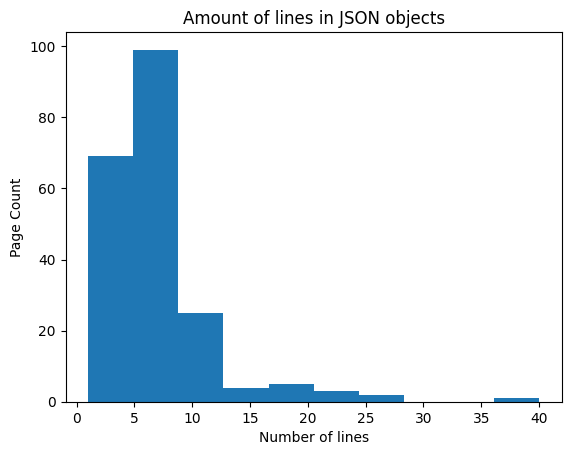

In [5]:
# Plot the distribution of line counts in the extracted text content
# WRITE YOUR CODE HERE

# This list will store the 
list = []

# Jsons are stored in this directory. Iterate and save their line counts. I will count
# The amount of newline characters in these.
path_to_jsons = "C:\\Repositories\\CS210\\Homework_2\\data\\parsed_data.jsons"
with open(path_to_jsons, "r") as jsons:
    for json_line in jsons:
        # Convert line to json
        jsonobj = json.loads(json_line)
        # What I do here basically is I strip the string of newlines and compare the new length of the string.
        # Therefore I get the amount of newlines.
        list.append(jsonobj["content"].count("\n"))

print(list)

plt.hist(list)
plt.title("Amount of lines in JSON objects")
plt.xlabel("Number of lines")
plt.ylabel("Page Count")

# Save the final plot in figures/content_line_count.png using the code below
plt.savefig('figures/content_line_count.png')

# Apparently .show() method deletes everything so I am invoking it afterwards.
plt.show()

### Task 2.3
In this task, you need to plot the distribution of the dates of the collected news articles.

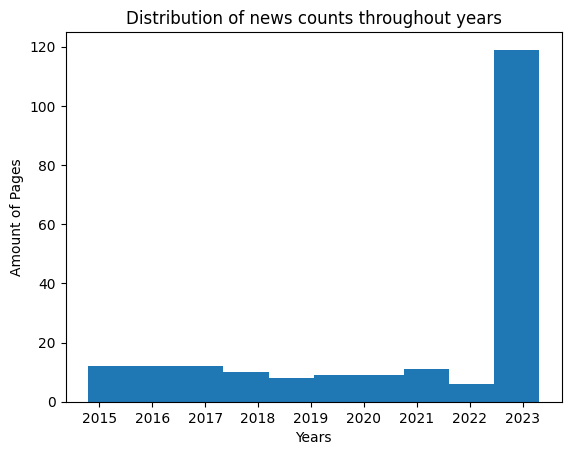

In [6]:
# Plot the distribution of dates from the extracted date information
# WRITE YOUR CODE HERE

list_of_strings = []
list_of_dates = []

path_to_jsons = "C:\\Repositories\\CS210\\Homework_2\\data\\parsed_data.jsons"
with open(path_to_jsons, "r") as jsons:
    for json_line in jsons:
        jsonobj = json.loads(json_line)
        # I will get the date objects later.
        list_of_strings.append(jsonobj["date"])


# I am going to use the datetime library to manage this situation.
# I will convert the date strings to unix epochs and append them to the respective list.
for date in list_of_strings:
    date_object = dt.datetime.strptime(date, "%d %B %Y")
    list_of_dates.append(date_object)

plt.hist(list_of_dates)
plt.title("Distribution of news counts throughout years")
plt.xlabel("Years")
plt.ylabel("Amount of Pages")

# Save the final plot in figures/date_dist.png using the code below
plt.savefig('figures/date_dist.png')

# Apparently .show() method deletes everything so I am invoking it afterwards.
plt.show()